In [1]:
import pandas as pd 
import matplotlib.pyplot as axis
import numpy as np

In [2]:
df=pd.read_csv('Boston_housing_modified.csv', header =0)
df.head(10)

,area_number,Longitude,crime,pollution_(nitrous_oxide),avr_rooms_per_house,%houses_built_<1940,distance_to_employment_offices,property tax,teacher-student_ratio,dark_skin_residents,poor_residents,median_price
0,0,-70.9550,0.00632,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,1,-70.9500,0.02731,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,1,-70.9360,0.02729,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,2,-70.9280,0.03237,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,2,-70.9220,0.06905,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
5,2,-70.9165,0.02985,0.458,6.430,58.7,6.0622,222,18.7,394.12,5.21,28.7
6,3,-70.9360,0.08829,0.524,6.012,66.6,5.5605,311,15.2,395.60,12.43,22.9
7,3,-70.9375,0.14455,0.524,6.172,96.1,5.9505,311,15.2,396.90,19.15,27.1
8,3,-70.9330,0.21124,0.524,5.631,100.0,6.0821,311,15.2,386.63,29.93,16.5
9,3,-70.9290,0.17004,0.524,6.004,85.9,6.5921,311,15.2,386.71,17.10,18.9


In [3]:
predictors = df.drop('median_price', axis = 1)
target = df['median_price']

In [4]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=11, random_state=10)

In [5]:
from sklearn.feature_selection import RFECV


rfecv = RFECV(estimator=model, step=1, cv=11, scoring='r2')
# Code - Savo:
# I would like to use a dimension selection tool called RFECV and give it a prediction tool to use as a parameter (Random Forest)
# I would like RFECV to remove one dimension with each iteration (step = 1)
# I would like the RFECV to divide the data into 5 parts for me and use these parts for effective validation of the results
# I would like the RFECV to evaluate the results after each dimension drop using the "accuracy" measure already known to me
# I still want the new iteration tool to be slid into a shell called "dimension_selection tool"

rfecv.fit(predictors, target)

RFECV(cv=11, estimator=RandomForestRegressor(n_estimators=11, random_state=10),
      scoring='r2')

In [6]:
print (rfecv.n_features_)
# Code -Savo:
# I know that the RFCV tool has a "n.features" function that returns the optimal number of dimensions
# Could you print it on the screen.

11


In [7]:
print (rfecv.support_)

[ True  True  True  True  True  True  True  True  True  True  True]


In [8]:
print (rfecv.estimator_.feature_importances_)

[0.01702763 0.02047621 0.03532212 0.01826246 0.44681744 0.02132855
 0.06524684 0.01876323 0.01304632 0.00833422 0.33537498]


In [9]:
print (rfecv.ranking_)

[1 1 1 1 1 1 1 1 1 1 1]


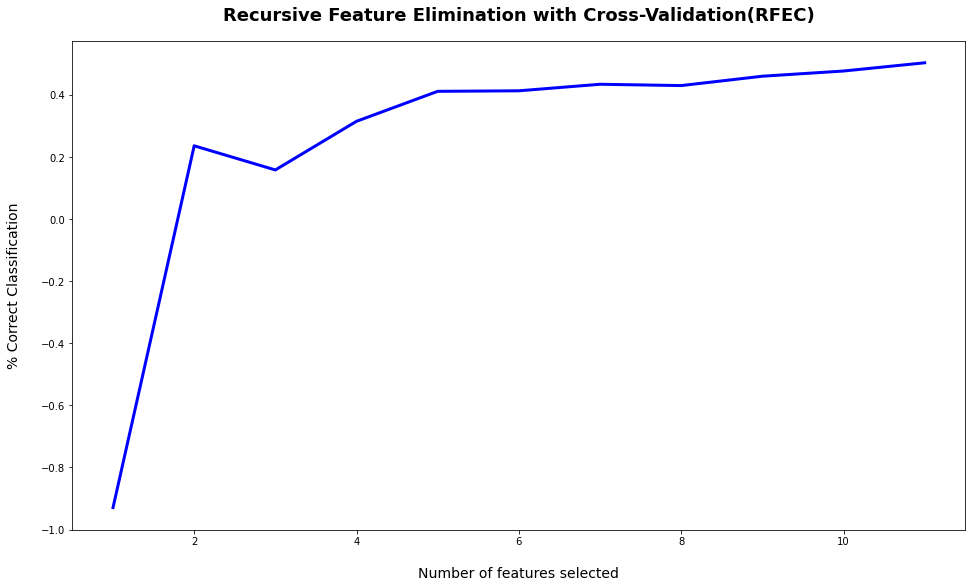

In [10]:
axis.figure(figsize=(16, 9))
axis.title('Recursive Feature Elimination with Cross-Validation(RFEC)', fontsize=18, fontweight='bold', pad=20)
axis.xlabel('Number of features selected', fontsize=14, labelpad=20)
axis.ylabel('% Correct Classification', fontsize=14, labelpad=20)
axis.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='blue', linewidth=3)

axis.show()

In [11]:
predictors.drop(predictors.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
predictors.insert(4,'median_price', df['median_price'])


In [12]:
predictors.head()

,area_number,Longitude,crime,pollution_(nitrous_oxide),median_price,avr_rooms_per_house,%houses_built_<1940,distance_to_employment_offices,property tax,teacher-student_ratio,dark_skin_residents,poor_residents
0,0,-70.955,0.00632,0.538,24.0,6.575,65.2,4.0900,296,15.3,396.90,4.98
1,1,-70.950,0.02731,0.469,21.6,6.421,78.9,4.9671,242,17.8,396.90,9.14
2,1,-70.936,0.02729,0.469,34.7,7.185,61.1,4.9671,242,17.8,392.83,4.03
3,2,-70.928,0.03237,0.458,33.4,6.998,45.8,6.0622,222,18.7,394.63,2.94
4,2,-70.922,0.06905,0.458,36.2,7.147,54.2,6.0622,222,18.7,396.90,5.33
